# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data

In [2]:
df_rv_tmp = pd.read_csv('../datasets/bgg-19m-reviews.csv')
df_bg = pd.read_csv('../datasets/games-cleaned.csv')

# Data Cleaning & EDA (Reviews)

In [3]:
df_rv = df_rv_tmp.copy()
df_rv.head()

,Unnamed: 0,user,rating,comment,ID,name
0,0,Torsten,10.0,NaN,30549,Pandemic
1,1,mitnachtKAUBO-I,10.0,Hands down my favorite new game of BGG CON 200...,30549,Pandemic
2,2,avlawn,10.0,I tend to either love or easily tire of co-op ...,30549,Pandemic
3,3,Mike Mayer,10.0,NaN,30549,Pandemic
4,4,Mease19,10.0,This is an amazing co-op game. I play mostly ...,30549,Pandemic


In [4]:
df_rv.shape

(18964807, 6)

ตัดรีวิวที่ `name` ไม่ได้อยู่ใน `df_bg`  และรีวิวที่ไม่มี `user`

In [5]:
df_rv = df_rv[df_rv['name'].isin(df_bg['name'])]
df_rv = df_rv[df_rv['user'] == df_rv['user']]
df_rv = df_rv[['user', 'name', 'rating', 'comment']]

df_rv.shape

(15217681, 4)

In [6]:
df_rv['rating'].describe()

count    1.521768e+07
mean     7.285726e+00
std      1.469725e+00
min      1.401300e-45
25%      6.500000e+00
50%      7.000000e+00
75%      8.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

ตัดรีวิวที่ `rating` น้อยกว่า 1

In [7]:
df_rv = df_rv[df_rv['rating']>=1]
df_rv['rating'].describe()

count    1.521768e+07
mean     7.285727e+00
std      1.469722e+00
min      1.000000e+00
25%      6.500000e+00
50%      7.000000e+00
75%      8.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

In [8]:
not_comment = df_rv.isna().sum().sort_values(ascending=False)[0]

d = {"doesn't comment": not_comment, 'comment': df_rv.shape[0]-not_comment}    
ser_comment = pd.Series(data=d, index=["doesn't comment", 'comment'])
ser_comment

doesn't comment    12730094
comment             2487584
dtype: int64

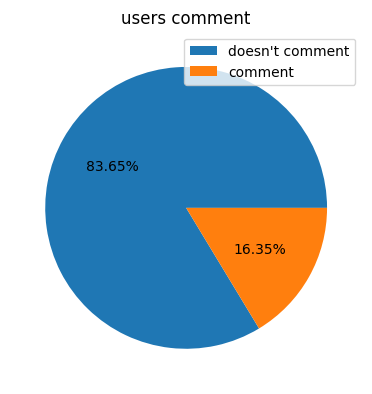

In [9]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('users comment')
plt.pie(ser_comment, autopct='%.2f%%')
plt.legend(ser_comment.index)
plt.show()

มีรีวิวที่ `comment` เพียง 16.37% จากรีวิวทั้งหมด (2.5 ล้านรีวิวจาก 15 ล้านรีวิว)

ตัดรีวิวที่ `user` คนเดิมรีวิวเกมเดิมหลายครั้ง โดยแทนที่ด้วยค่าเฉลี่ย

In [10]:
df_rv = df_rv.groupby(['user', 'name'], as_index=False).mean()
df_rv.head()

,user,name,rating
0,Fu_Koios,Shadowrift,9.0
1,beastvol,Candamir: The First Settlers,5.0
2,beastvol,Catan,8.0
3,beastvol,Catan Card Game,7.0
4,beastvol,Caylus,9.0


ตัด `user` ที่มีการให้คะแนนน้อยกว่า 450 เกม

In [11]:
cv = df_rv['user'].value_counts()
df_rv = df_rv[df_rv['user'].isin(cv[cv >= 450].index)]
df_rv.shape

(2018715, 3)

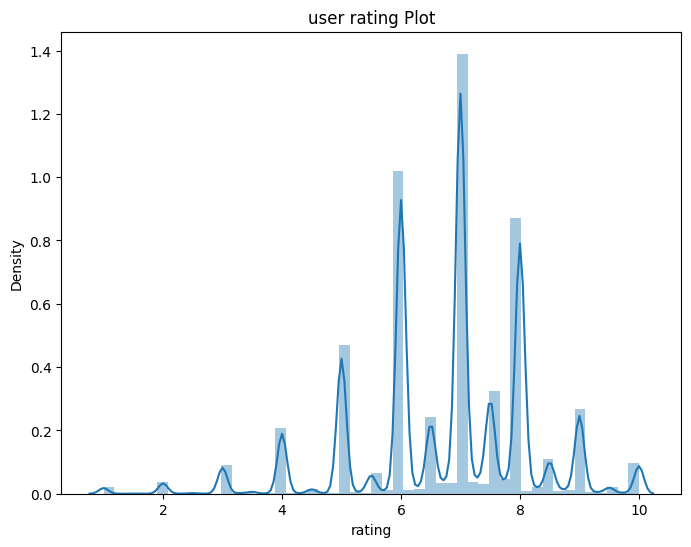

In [12]:
plt.figure(figsize=(8,6))
plt.title('user rating Plot')
sns.distplot(df_rv['rating'])
plt.show()

ผู้ใช้ส่วนใหญ่ให้ `rating` ที่ 6-8

# Save clean data to CSV

In [14]:
# df_rv.to_csv('reviews-cleaned.csv', index=False)